# **Submission: Proyek Pertama : Predictive Analytics**
## **Health and Lifestyle Data for Regression**
- Nama: Gold Stein Maxwell Massie
- Email: goldsteinmaxwellmassie@gmail.com
- Id Dicoding: maxwellmassie

link dataset : [Dataset ](https://www.kaggle.com/datasets/pratikyuvrajchougule/health-and-lifestyle-data-for-regression/)

# **1. Perkenalan Dataset**
Dataset ini digunakan untuk menganalisis dampak berbagai faktor gaya hidup terhadap Health Score seseorang dengan pendekatan regresi. Data ini mencakup variabel-variabel seperti usia, indeks massa tubuh (BMI), frekuensi olahraga, kualitas diet, durasi tidur, status merokok, dan konsumsi alkohol. Dataset ini sangat cocok untuk eksplorasi data, pembangunan model machine learning, serta pemahaman hubungan antara gaya hidup dan kesehatan.

## Variabel-variabel pada Health and Lifestyle Data for Regression dataset adalah sebagai berikut:
- **Age**: Usia individu dalam satuan tahun. Bertipe _continuous variable_.
- **BMI**: Body Mass Index (Indeks Massa Tubuh) individu, digunakan untuk mengukur status berat badan. Bertipe _continuous variable_.
- **Exercise_Frequency**: Jumlah hari dalam seminggu individu melakukan olahraga. Bertipe _categorical_ dengan nilai 0–7.
- **Diet_Quality**: Indeks kualitas pola makan, di mana nilai yang lebih tinggi mencerminkan pola makan yang lebih sehat. Skala 0–100, bertipe _continuous_.
- **Sleep_Hours**: Rata-rata jam tidur individu setiap malam. Bertipe _continuous_.
- **Smoking_Status**: Status merokok individu, di mana 0 = Non-smoker dan 1 = Smoker. Bertipe _binary categorical_.
- **Alcohol_Consumption**: Rata-rata jumlah konsumsi alkohol per minggu dalam satuan unit. Bertipe _continuous_.
- **Health_Score**: Skor kesehatan yang dihitung berdasarkan faktor-faktor gaya hidup di atas, mencerminkan status kesehatan secara keseluruhan. Skala 0–100, bertipe _continuous_.

# **2. Import Library**

Pada tahap awal ini, berbagai library Python diimpor untuk mendukung proses analisis data dan pembangunan model prediktif.

- **pandas**, **numpy**: Untuk manipulasi dan analisis data.
- **matplotlib**, **seaborn**: Untuk visualisasi data dan eksplorasi pola.
- **LinearRegression**: Model regresi linier sederhana sebagai baseline.
- **GradientBoostingRegressor**: Model ensemble yang powerful untuk meningkatkan akurasi.
- **train_test_split**: Membagi dataset menjadi data latih dan uji.
- **StandardScaler**: Untuk normalisasi fitur numerik.
- **mean_absolute_error**, **mean_squared_error**, **r2_score**: Metrik evaluasi performa model regresi.
- **warnings.filterwarnings('ignore')**: Mengabaikan warning untuk tampilan output yang lebih bersih.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


# **3. Memuat Dataset**

In [2]:
df = pd.read_csv('synthetic_health_data.csv')
df.head()

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
0,45.960570,31.996777,5,55.403270,7.300359,0,2.834707,70.542122
1,38.340828,29.623168,6,41.838357,7.012419,1,7.199517,57.244637
2,47.772262,25.298152,5,76.904948,6.028641,1,4.097944,96.333722
3,58.276358,21.765316,2,49.756767,5.802714,1,3.649377,61.321783
4,37.190160,28.491117,2,44.218737,7.912548,0,2.839795,67.175894


# **4. Exploratory Data Analysis (EDA)**

In [3]:
#menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   float64
 1   BMI                  1000 non-null   float64
 2   Exercise_Frequency   1000 non-null   int64  
 3   Diet_Quality         1000 non-null   float64
 4   Sleep_Hours          1000 non-null   float64
 5   Smoking_Status       1000 non-null   int64  
 6   Alcohol_Consumption  1000 non-null   float64
 7   Health_Score         1000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


menggunakan fungsi df.info() untuk melihat ringkasan dataset yang berisi 1000 baris dan 8 kolom. Dari output terlihat bahwa tidak ada nilai yang hilang (missing values) dan semua kolom memiliki tipe data yang sesuai, yaitu 6 kolom numerik (float64) dan 2 kolom integer (int64). Informasi ini penting untuk memastikan data lengkap dan siap digunakan

In [4]:
# menampilkan statistik data numerik
df.describe()


,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.231985,25.354181,2.888000,69.952977,6.973135,0.499000,3.079377,85.479947
std,11.750591,4.987272,1.995354,14.972061,1.517218,0.500249,2.084564,13.633845
min,1.104792,10.298057,0.000000,19.907497,2.431107,0.000000,-3.592506,29.106017
25%,32.228916,21.968792,1.000000,59.945481,5.903351,0.000000,1.644111,76.430819
50%,40.303607,25.315386,3.000000,69.975151,6.990847,0.000000,3.064261,87.498996
75%,47.775327,28.644411,5.000000,80.527839,8.054595,1.000000,4.489293,99.762644
max,86.232778,40.965538,6.000000,110.265186,11.638962,1.000000,11.105100,100.000000


Dengan menggunakan df.describe(), kita dapat melihat mendapatkan ringkasan statistik dari semua variabel numerik dalam dataset, seperti rata-rata (mean), standar deviasi (std), nilai minimum, kuartil pertama (25%), median (50%), kuartil ketiga (75%), dan nilai maksimum. Misalnya, rata-rata usia adalah sekitar 40 tahun dengan rentang dari 1 hingga 86 tahun, dan rata-rata skor kesehatan (Health_Score) adalah sekitar 85 dari skala 100. Statistik ini membantu memahami distribusi data dan mendeteksi potensi outlier atau nilai ekstrim yang perlu diperhatikan sebelum membangun model.

In [5]:
# mengecek missing values per kolom
missing_values = df.isnull().sum()
print("Missing values per kolom:")
print(missing_values)

# mengecek total missing values
total_missing = df.isnull().sum().sum()
print(f"\nTotal missing values di dataset: {total_missing}")

Missing values per kolom:
Age                    0
BMI                    0
Exercise_Frequency     0
Diet_Quality           0
Sleep_Hours            0
Smoking_Status         0
Alcohol_Consumption    0
Health_Score           0
dtype: int64

Total missing values di dataset: 0


mengecek missing values untuk memastikan apakah ada data yang hilang di setiap kolom dataset. Dari hasilnya tidak ada satupun nilai yang kosong atau null di semua kolom—semua data lengkap. Ini artinya dataset sudah bersih dari missing values, sehingga tidak perlu dilakukan imputasi atau pembersihan khusus terkait data yang hilang sebelum melanjutkan analisis dan pemodelan.

In [6]:
# mengecek jumlah data duplikat
duplicate_data = df.duplicated().sum()
print(f"\nJumlah data duplikat: {duplicate_data}")


Jumlah data duplikat: 0


mengecek apakah ada data yang duplikat dalam dataset untuk memastikan setiap baris data unik dan tidak ada pengulangan yang bisa memengaruhi hasil analisis. Hasilnya menunjukkan jumlah data duplikat adalah 0, yang berarti tidak ada baris data yang sama persis, sehingga dataset benar-benar bersih dan siap digunakan untuk proses selanjutnya tanpa perlu penghapusan data duplikat.

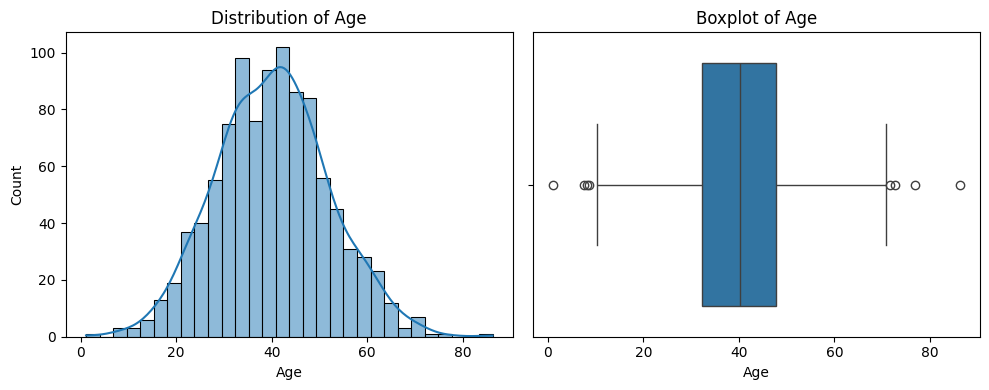

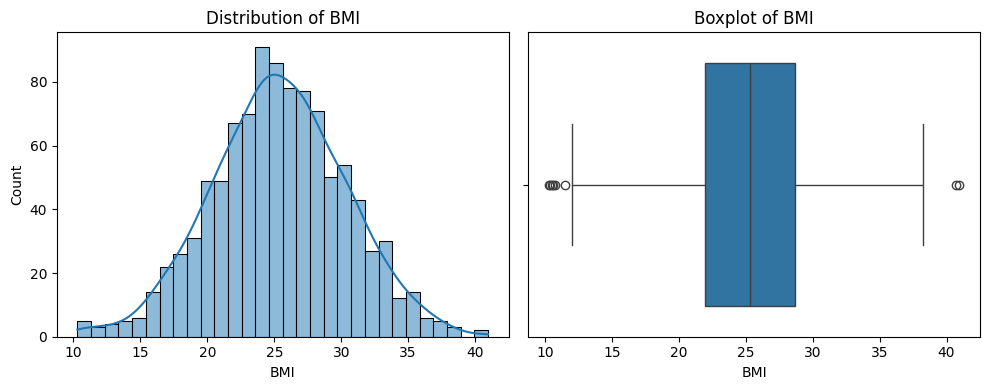

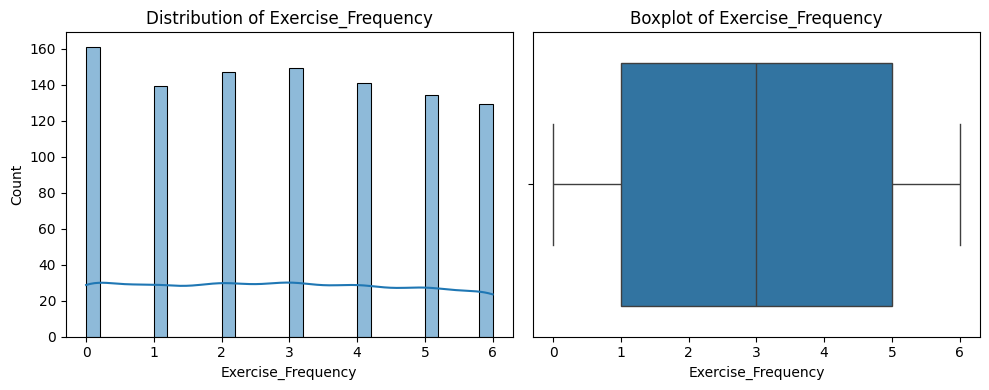

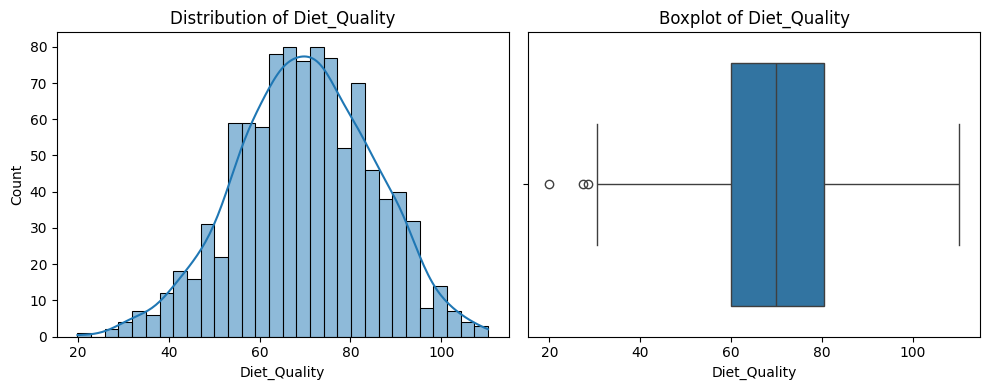

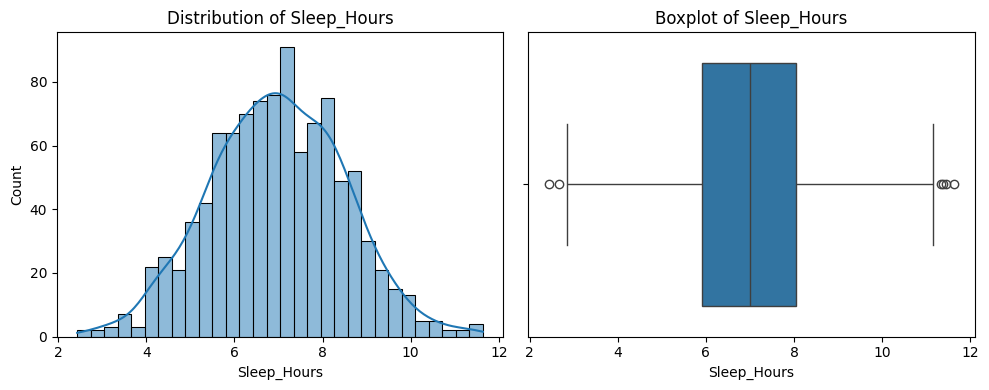

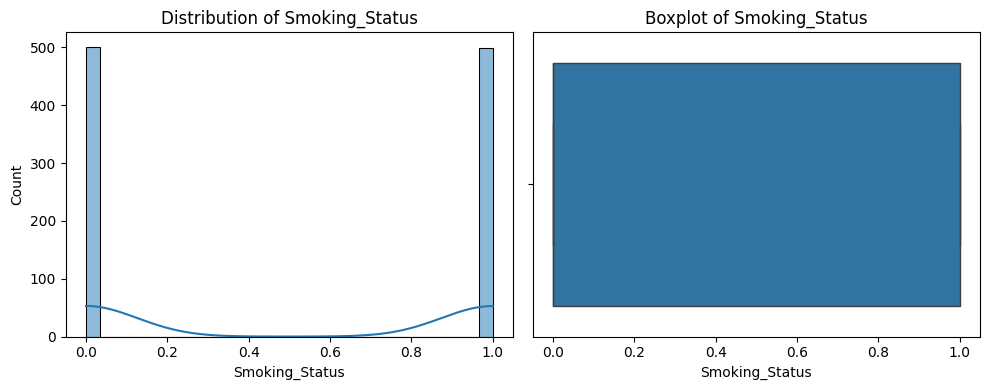

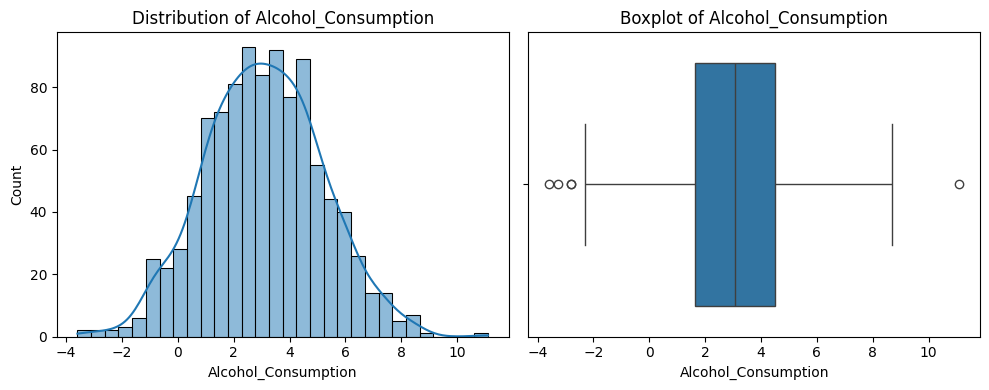

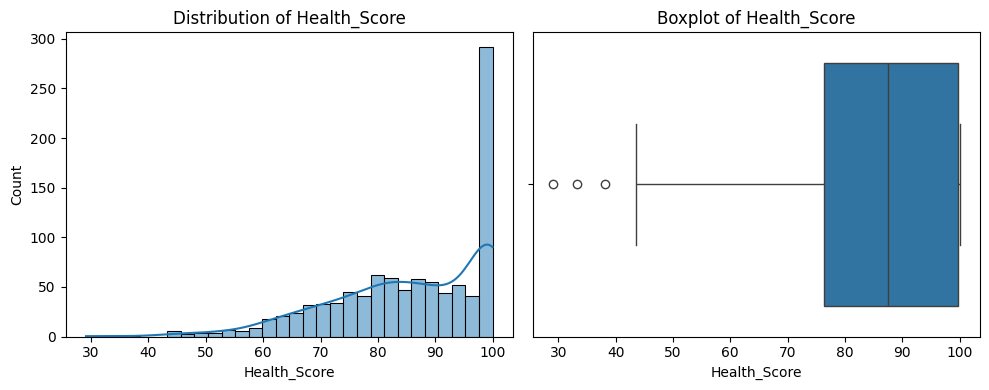

In [7]:
def univariate_analysis(df):
    # Kolom numerik dan biner
    num_cols = df.columns.tolist()

    # Visualisasi distribusi dan boxplot untuk tiap kolom
    for col in num_cols:
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')

        plt.tight_layout()
        plt.show()

# fungsi dengan dataframe
univariate_analysis(df)

Pada tahap univariate analysis ini, saya membuat visualisasi distribusi dan boxplot untuk setiap kolom numerik dan biner di dataset. Grafik distribusi (histogram dengan KDE) membantu melihat pola sebaran data, apakah data terdistribusi normal, skewed, atau ada banyak nilai yang menumpuk di area tertentu. Sementara boxplot digunakan untuk mendeteksi potensi outlier atau nilai ekstrim pada masing-masing fitur. Analisis ini penting untuk memahami karakteristik setiap variabel sebelum membangun model, serta untuk mengantisipasi perlunya transformasi atau penanganan khusus terhadap data yang tidak biasa. untuk penjelasan lebih lanjut hasil dari visualisasi ada pada **draf laporan README.md**

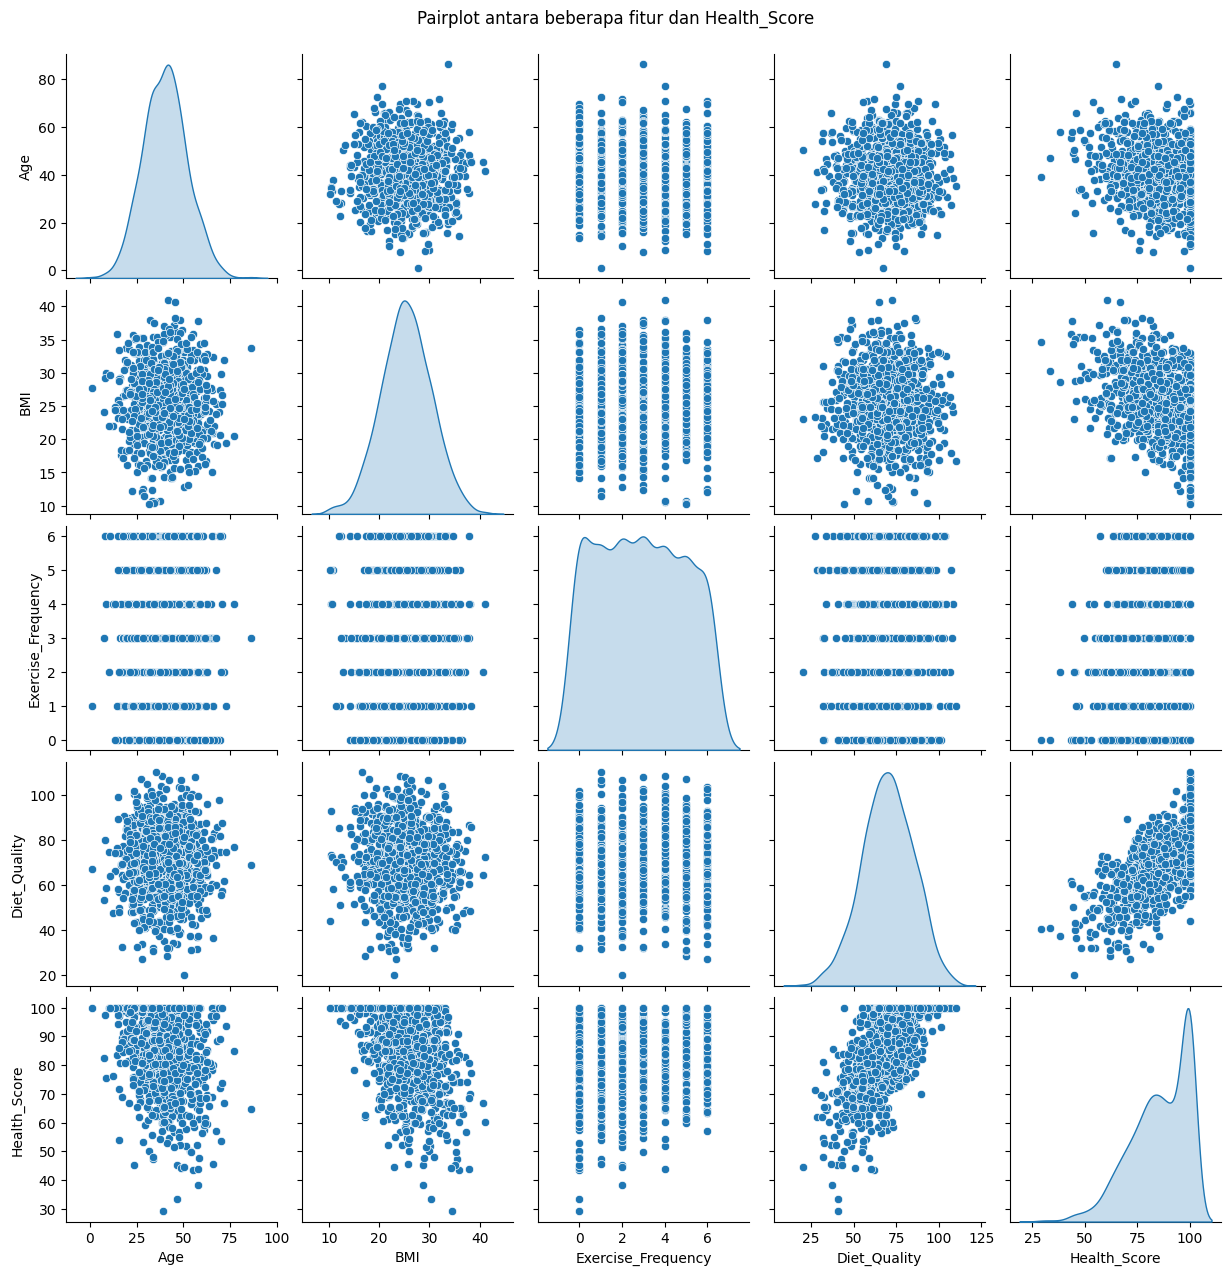

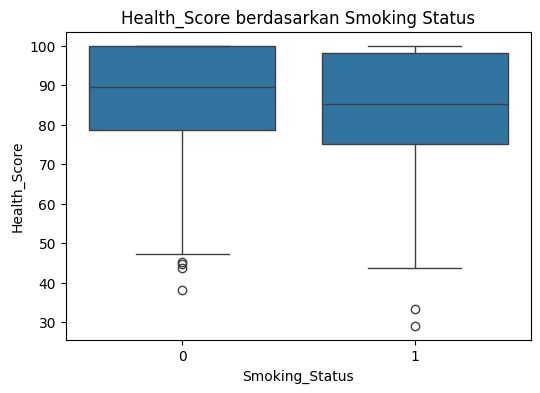

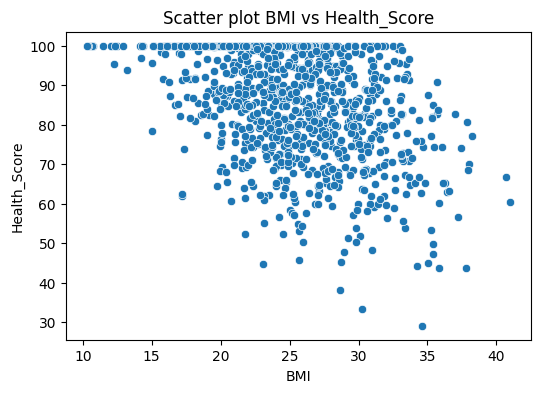

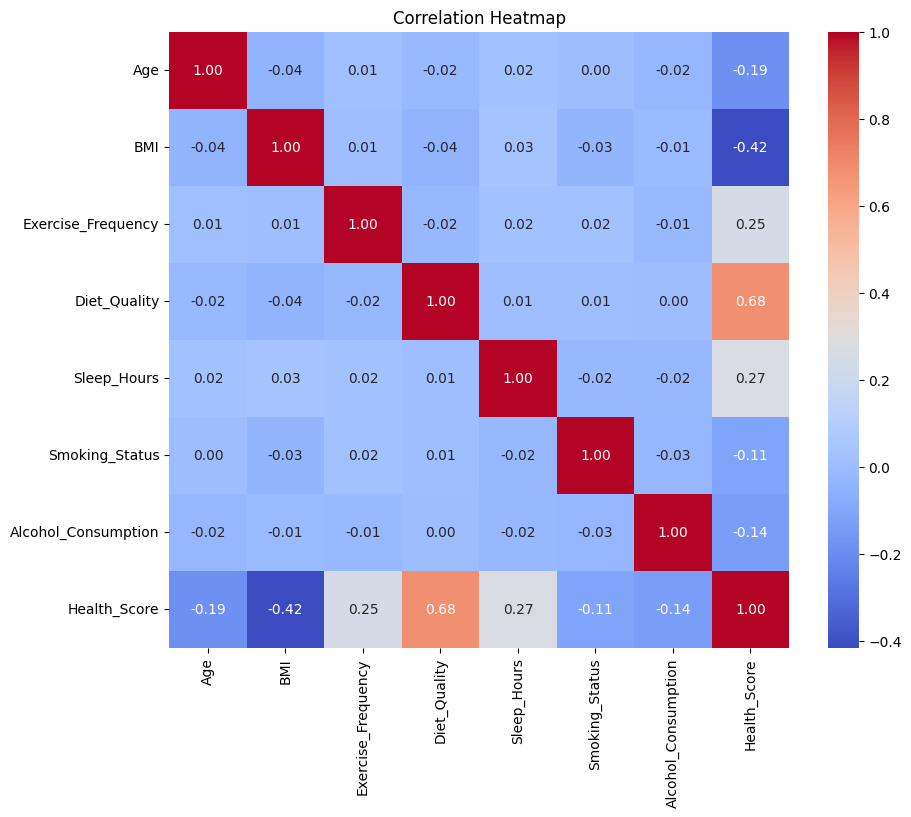

In [8]:
# Pairplot untuk subset fitur dan target
sns.pairplot(df[['Age', 'BMI', 'Exercise_Frequency', 'Diet_Quality', 'Health_Score']], diag_kind='kde')
plt.suptitle('Pairplot antara beberapa fitur dan Health_Score', y=1.02)
plt.show()

# Boxplot Health_Score berdasarkan Smoking_Status (biner)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Smoking_Status', y='Health_Score', data=df)
plt.title('Health_Score berdasarkan Smoking Status')
plt.show()

# Scatter plot BMI vs Health_Score
plt.figure(figsize=(6, 4))
sns.scatterplot(x='BMI', y='Health_Score', data=df)
plt.title('Scatter plot BMI vs Health_Score')
plt.show()

# Heatmap Korelasi
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Pada tahap ini, dilakukan analisis multivariate untuk mengeksplorasi hubungan antar berbagai fitur dan target Health_Score melalui beberapa visualisasi:

- Pairplot menampilkan distribusi dan hubungan antar variabel Age, BMI, Exercise_Frequency, Diet_Quality, dan Health_Score sekaligus, memberikan gambaran pola distribusi dan potensi korelasi antar variabel.

- Boxplot Health_Score berdasarkan Smoking_Status memperlihatkan perbedaan skor kesehatan antara perokok dan bukan perokok, membantu melihat dampak merokok secara kategorikal terhadap kesehatan.

- Scatter plot BMI vs Health_Score menunjukkan hubungan linear potensial antara BMI dan skor kesehatan, berguna untuk mengidentifikasi pola sebaran dan outlier.

- Heatmap Korelasi memvisualisasikan kekuatan dan arah korelasi antar semua variabel numerik dalam dataset, membantu mengidentifikasi fitur mana yang memiliki hubungan paling kuat dengan Health_Score sebagai kandidat penting untuk model prediktif.

untuk penjelasan lebih lanjut hasil dari visualisasi ada pada **draf laporan README.md**

# **5. Data Preprocessing**

1. Memisahkan fitur(Independent) dan target(dependent).

2. Membagi dataset menjadi data train dan test agar model dapat dilatih dan dievaluasi secara objektif pada data yang belum pernah dilihat sebelumnya

3. Melakukan standardisasi pada fitur numerik supaya semua fitur memiliki skala yang seragam, sehingga model dapat belajar lebih efektif dan prediksi menjadi lebih akurat.

In [9]:
# memisahkan variable independent dan dependent
X = df.drop('Health_Score', axis=1)
y = df['Health_Score']

In [10]:
# Membagi data menjadi train dan test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Daftar fitur numerik untuk distandarisasi
num_features = ['Age', 'BMI', 'Exercise_Frequency', 'Diet_Quality', 'Sleep_Hours', 'Alcohol_Consumption']

# Inisialisasi scaler
scaler = StandardScaler()

# Fit scaler hanya di data train, lalu transformasi train dan test
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

# **6. Pembangunan Model Solution**

## **6.1 Model Solution dengan Linear Regression**

Pada tahap ini, model pertama yang digunakan adalah Linear Regression, yang merupakan algoritma regresi linier sederhana dan interpretatif. Model ini diinisialisasi tanpa parameter khusus, karena scikit-learn telah menyediakan nilai default yang umumnya cukup baik untuk baseline.

**Kelebihan Linear Regression**:

- Mudah diinterpretasikan.
- Cepat dalam pelatihan, terutama untuk dataset kecil hingga menengah.
- Cocok sebagai baseline karena kesederhanaannya.

**Kekurangan Linear Regression**:

- Tidak mampu menangkap hubungan non-linear antara fitur dan target.
- Sangat sensitif terhadap multikolinearitas dan outlier.



In [12]:
# Inisialisasi model Linear Regresi
lr_model = LinearRegression()

In [13]:
# melatih model dengan data training
lr_model.fit(X_train, y_train)

LinearRegression()

## **6.2 Model Solution dengan GradientBoostingRegressor**

model Gradient Boosting Regressor, yang merupakan algoritma ensemble berbasis pohon keputusan. Model ini diinisialisasi dengan parameter default dan random state agar hasil replikasi tetap konsisten.

**Kelebihan Gradient Boosting Regressor**:

- Dapat menangkap hubungan non-linear dengan sangat baik.
- Biasanya menghasilkan akurasi tinggi pada banyak jenis data.
- Memiliki kemampuan built-in untuk menangani outlier dan interaksi antar fitur.

**Kekurangan Gradient Boosting Regressor**:

- Waktu pelatihan lebih lama dibanding model linier.
- Memerlukan tuning parameter agar performanya optimal.


```random_state=42```:
Parameter ini digunakan untuk mengatur seed dari proses pembangkitan bilangan acak. Tujuannya agar hasil pelatihan model menjadi reproducible (konsisten setiap kali dijalankan). Angka 42 hanyalah angka acak yang umum digunakan untuk memastikan keacakan tetap sama.

In [14]:
# Inisialisasi model GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(random_state=42)

In [15]:
# melatih model dengan data training
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

###Pemilihan Model Terbaik
Dalam studi ini digunakan dua algoritma yang berbeda, yaitu Linear Regression dan Gradient Boosting Regressor. Pemilihan model terbaik akan dilakukan berdasarkan hasil evaluasi metrik regresi (MAE, MSE, dan R²) yang akan dijelaskan di tahap selanjutnya.

# **7. Feature Importances**

Pada tahap Feature Importance, dengan menggunakan model Gradient Boosting Regressor yang telah dilatih untuk mengevaluasi seberapa besar kontribusi masing-masing fitur dalam memprediksi Health_Score. Hasilnya ditampilkan dalam bentuk tabel dan visualisasi bar chart.

In [16]:
# Mendapatkan nilai feature importance dari model Gradient Boosting
importances = gbr_model.feature_importances_

# Mendapatkan nama fitur
feature_names = X.columns  # asumsi X adalah DataFrame berisi fitur

# Menggabungkan dalam DataFrame agar mudah dianalisis
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


               Feature  Importance
3         Diet_Quality    0.522072
1                  BMI    0.211881
2   Exercise_Frequency    0.086639
4          Sleep_Hours    0.081801
0                  Age    0.048147
6  Alcohol_Consumption    0.033162
5       Smoking_Status    0.016297


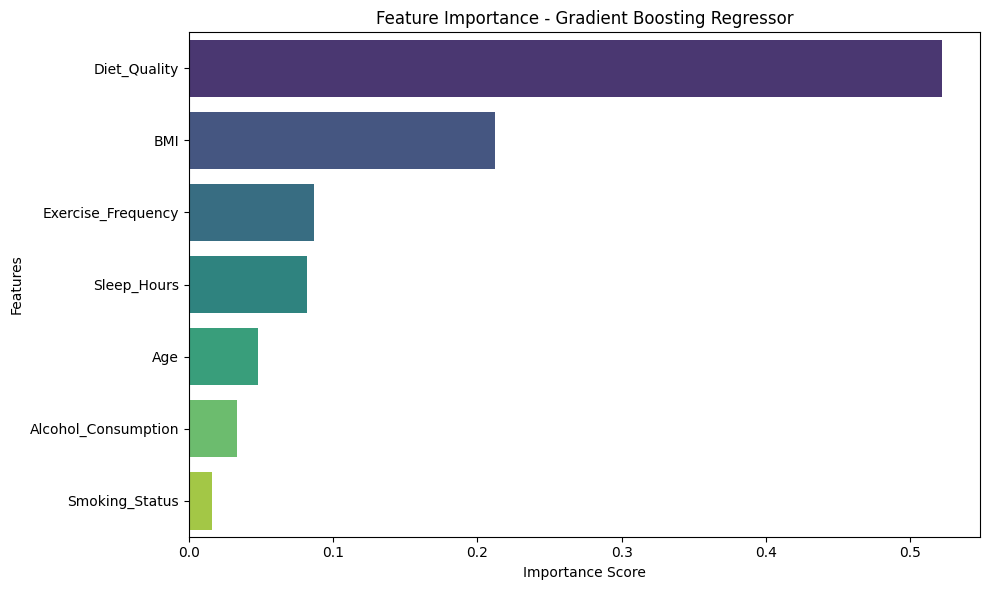

In [17]:
# menampilkan data tabular feature importance
print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance - Gradient Boosting Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

Dari output yang dihasilkan, fitur dengan pengaruh terbesar adalah:

- **Diet_Quality** dengan skor 0.522, menandakan bahwa kualitas diet memiliki pengaruh dominan terhadap skor kesehatan.
- Diikuti oleh **BMI (0.211)** dan **Exercise_Frequency (0.086)**, yang juga berperan penting.
- Fitur lain seperti **Sleep_Hours**, **Age**, dan **Alcohol_Consumption** memberikan kontribusi yang lebih kecil.
- **Smoking_Status** memiliki pengaruh paling rendah **(0.016)**, yang bisa jadi karena distribusi datanya atau dampaknya yang kurang terlihat dalam model ini.

# **8. Evaluasi**

Menggunakan 3 metrik evaluasi:
1. **MAE (Mean Absolute Error)** adalah Rata-rata dari kesalahan yang dihitung berdasarkan nilai absolut antara nilai sebenarnya dan nilai prediksi. dengan rumus sebagai berikut:
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$
* $n$ adalah jumlah sampel data
* $y_i$ adalah nilai aktual untuk sampel ke-$i$
* $\hat{y}_i$ (dibaca "y-topi") adalah nilai prediksi untuk sampel ke-$i$
* $|y_i - \hat{y}_i|$ adalah nilai absolut dari selisih antara nilai aktual dan nilai prediksi


2. **MSE (Mean Squared Error)** adalah Nilai rata-rata dari kuadrat selisih antara nilai aktual dan nilai yang diprediksi oleh model. dengan rumus sebagai berikut:
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
* $n$ adalah jumlah sampel data
* $y_i$ adalah nilai aktual untuk sampel ke-$i$
* $\hat{y}_i$ (dibaca "y-topi") adalah nilai prediksi untuk sampel ke-$i$


3. **R² Score** (Koefisien Determinasi) adalah Salah satu ukuran yang digunakan untuk menilai seberapa efektif model regresi linear dalam menjelaskan variasi yang terdapat dalam data. dengan rumus sebagai berikut:
$$
R^2 = 1 - \frac{SSR}{SST}
$$

* $SSR$ (Sum of Squares of Residuals) adalah jumlah kuadrat sisa (error)
* $SST$ (Total Sum of Squares) adalah jumlah kuadrat total

**dijabarkan dengan**:
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
* $n$ adalah jumlah sampel data
* $y_i$ adalah nilai aktual untuk sampel ke-$i$
* $\hat{y}_i$ (dibaca "y-topi") adalah nilai prediksi untuk sampel ke-$i$
* $\bar{y}$ (dibaca "y-bar") adalah nilai rata-rata dari nilai aktual ($y_i$)
* $\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ adalah Sum of Squares of Residuals (SSR), yang mengukur variasi yang tidak dijelaskan oleh model.
* $\sum_{i=1}^{n} (y_i - \bar{y})^2$ adalah Total Sum of Squares (SST), yang mengukur total variasi dalam variabel dependen.

In [18]:
# Prediksi dengan kedua model
y_pred_lr = lr_model.predict(X_test) # model linear regression
y_pred_gbr = gbr_model.predict(X_test) # model Gradient Boosting Regressor

# Evaluasi Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Evaluasi Gradient Boosting Regressor
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# membuat DataFrame hasil evaluasi
evaluation_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Gradient Boosting'],
    'MAE': [mae_lr, mae_gbr],
    'MSE': [mse_lr, mse_gbr],
    'R2 Score': [r2_lr, r2_gbr]
})

# menampilkan DataFrame
print(evaluation_df)


               Model       MAE        MSE  R2 Score
0  Linear Regression  4.652751  37.241883  0.808979
1  Gradient Boosting  3.932299  27.927775  0.856753


Berdasarkan hasil evaluasi, model Gradient Boosting Regressor menunjukkan performa yang lebih baik dibandingkan Linear Regression. Hal ini terlihat dari nilai MAE (Mean Absolute Error) sebesar 3.93 yang lebih rendah dibandingkan Linear Regression sebesar 4.65, serta nilai MSE (Mean Squared Error) sebesar 27.93 yang juga lebih kecil dibandingkan 37.24. Selain itu, R² Score dari Gradient Boosting mencapai 0.86, lebih tinggi dari Linear Regression yang hanya 0.81, yang menunjukkan bahwa model ini mampu menjelaskan variasi data target dengan lebih baik. Dengan demikian, Gradient Boosting Regressor dipilih sebagai model terbaik untuk memprediksi Health Score karena memberikan error yang lebih kecil dan kemampuan prediktif yang lebih tinggi.